In [129]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [51]:
data = pd.read_csv("worker_churn.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [53]:
for column in data.columns:
       print(f"{column} has {data[column].nunique()} unique values.")


Age has 43 unique values.
Attrition has 2 unique values.
BusinessTravel has 3 unique values.
DailyRate has 886 unique values.
Department has 3 unique values.
DistanceFromHome has 29 unique values.
Education has 5 unique values.
EducationField has 6 unique values.
EmployeeCount has 1 unique values.
EmployeeNumber has 1470 unique values.
EnvironmentSatisfaction has 4 unique values.
Gender has 2 unique values.
HourlyRate has 71 unique values.
JobInvolvement has 4 unique values.
JobLevel has 5 unique values.
JobRole has 9 unique values.
JobSatisfaction has 4 unique values.
MaritalStatus has 3 unique values.
MonthlyIncome has 1349 unique values.
MonthlyRate has 1427 unique values.
NumCompaniesWorked has 10 unique values.
Over18 has 1 unique values.
OverTime has 2 unique values.
PercentSalaryHike has 15 unique values.
PerformanceRating has 2 unique values.
RelationshipSatisfaction has 4 unique values.
StandardHours has 1 unique values.
StockOptionLevel has 4 unique values.
TotalWorkingYears 

In [54]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)


In [55]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [84]:
data = pd.get_dummies(data, drop_first=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [79]:
data['Attrition_Yes'].value_counts()
data['Attrition_Yes'].value_counts(normalize=True)


Attrition_Yes
False    0.838776
True     0.161224
Name: proportion, dtype: float64

In [60]:
data.groupby('Attrition_Yes')['MonthlyIncome'].mean()

Attrition_Yes
False    6832.739659
True     4787.092827
Name: MonthlyIncome, dtype: float64

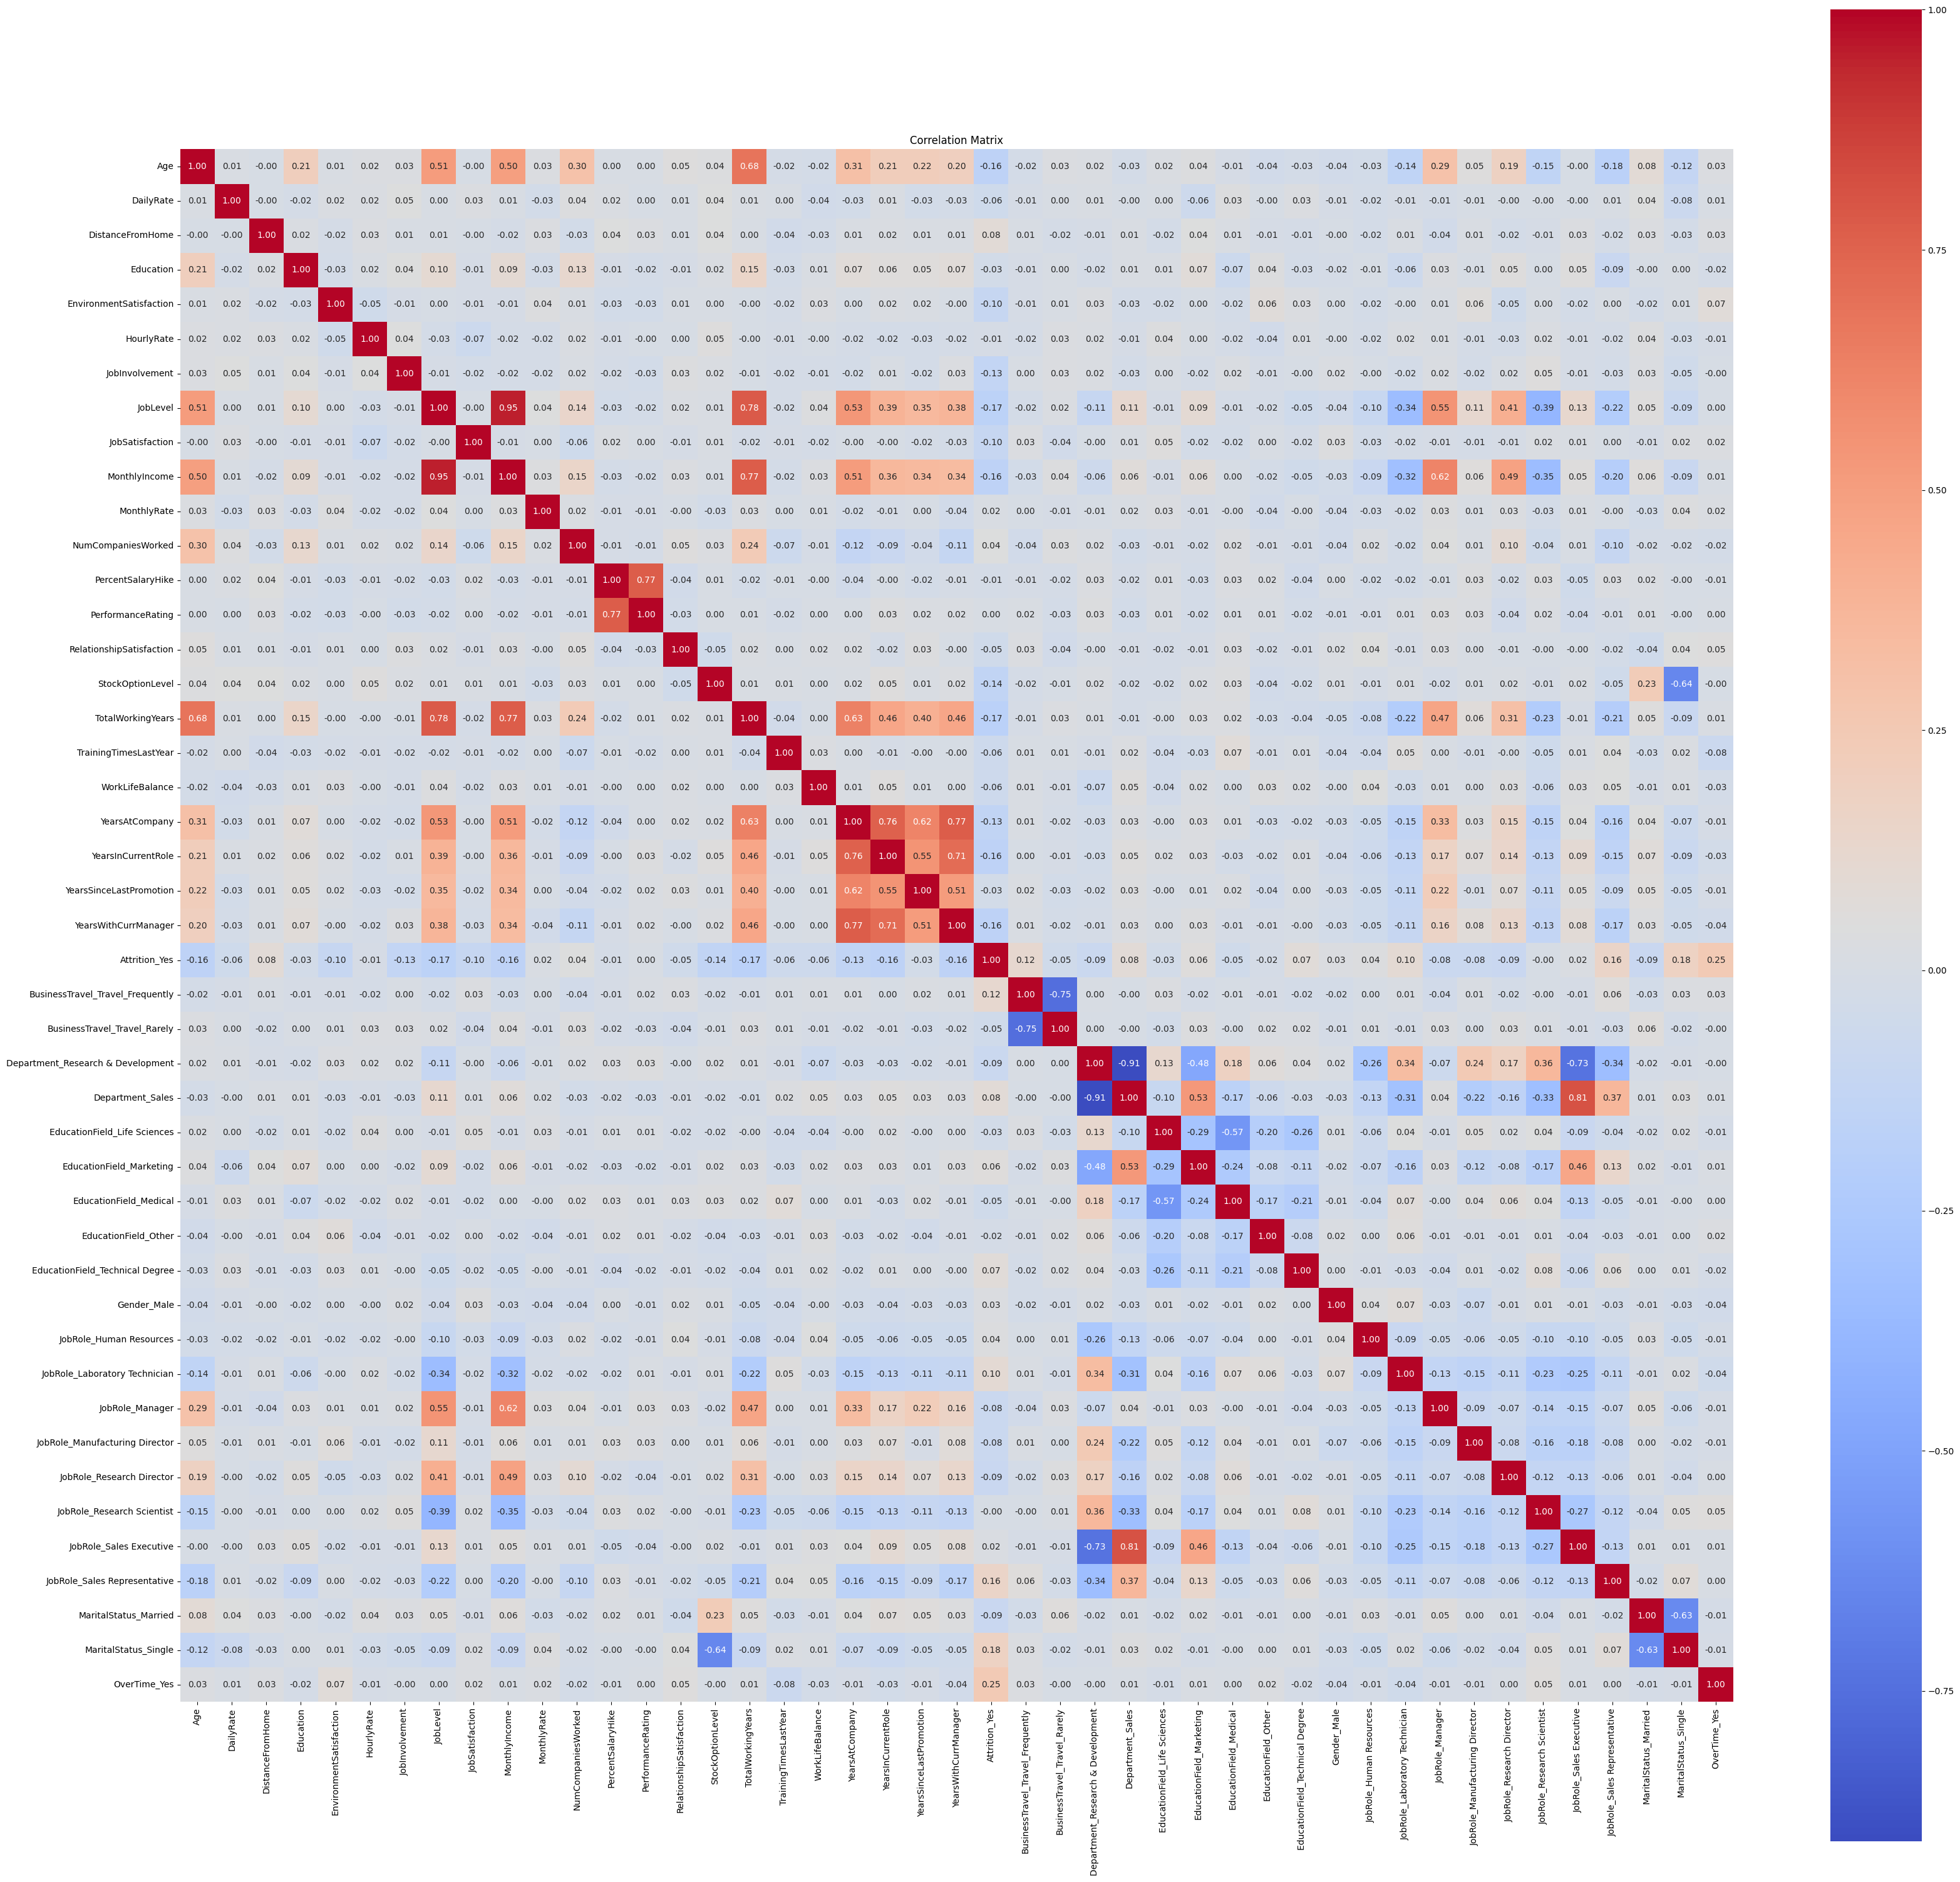

In [73]:
plt.figure(figsize=(40,38))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix") 
plt.show()

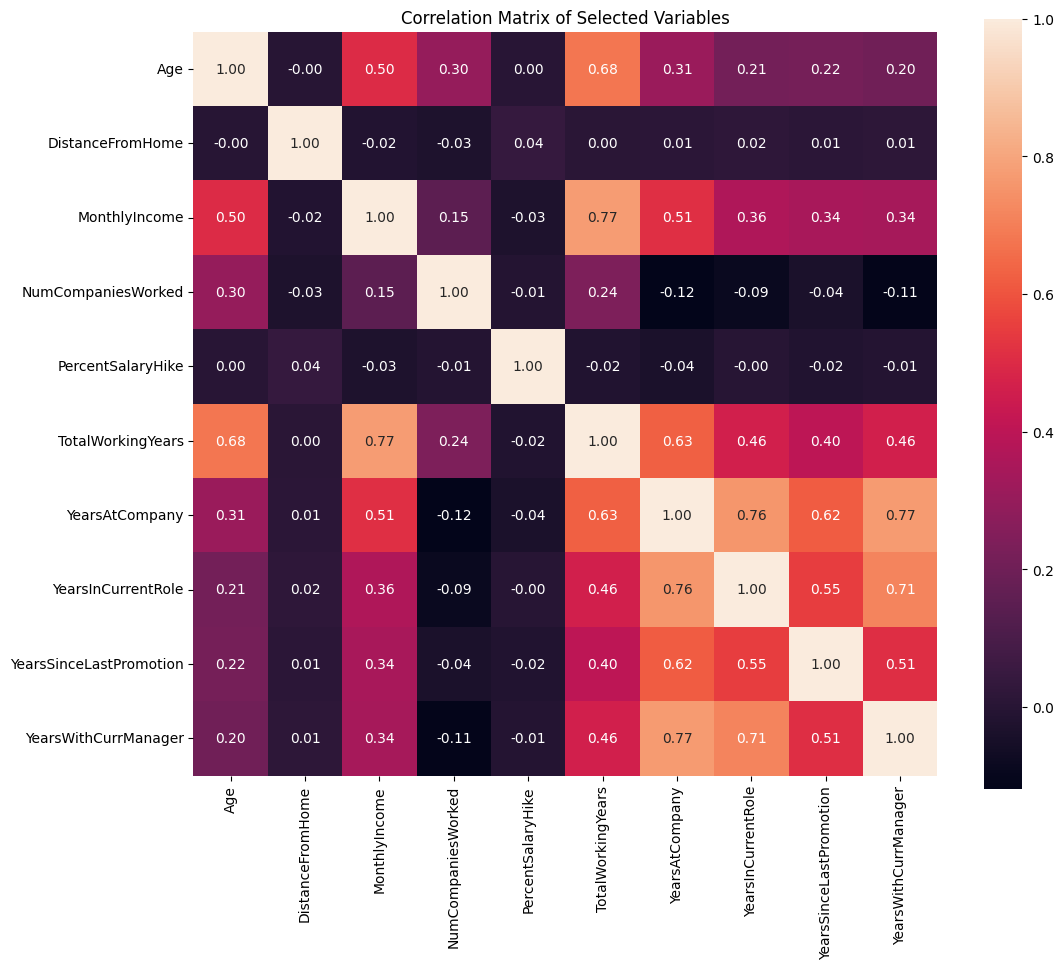

In [76]:
vars_to_plot = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
corr = data[vars_to_plot].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Variables")
plt.show()

Need to choose specific variables to look at since there are so many available. I plan to separate my data into 4 predictor sets. One being time/experience variables, second being compensation/reward variables, third being life/surrounding environment variables, and finally field/role/education variables.

In [95]:
time_exp_data = ["Age", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears", "NumCompaniesWorked", "TrainingTimesLastYear"]
comp_reward_data = ["MonthlyIncome", "PercentSalaryHike", "HourlyRate", "DailyRate", "MonthlyRate", "StockOptionLevel", "OverTime_Yes"]
life_env_data = ["WorkLifeBalance", "MaritalStatus_Married", "MaritalStatus_Single", "Gender_Male", "DistanceFromHome", "EnvironmentSatisfaction", "JobSatisfaction", 
                     "RelationshipSatisfaction", "JobInvolvement", "PerformanceRating"]
job_role_data = ["JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", 
                      "JobRole_Sales Executive", "JobRole_Sales Representative", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Education", "EducationField_Life Sciences", 
                      "EducationField_Marketing", "EducationField_Medical", "EducationField_Other", "EducationField_Technical Degree", "Department_Research & Development", "Department_Sales", "JobLevel"]

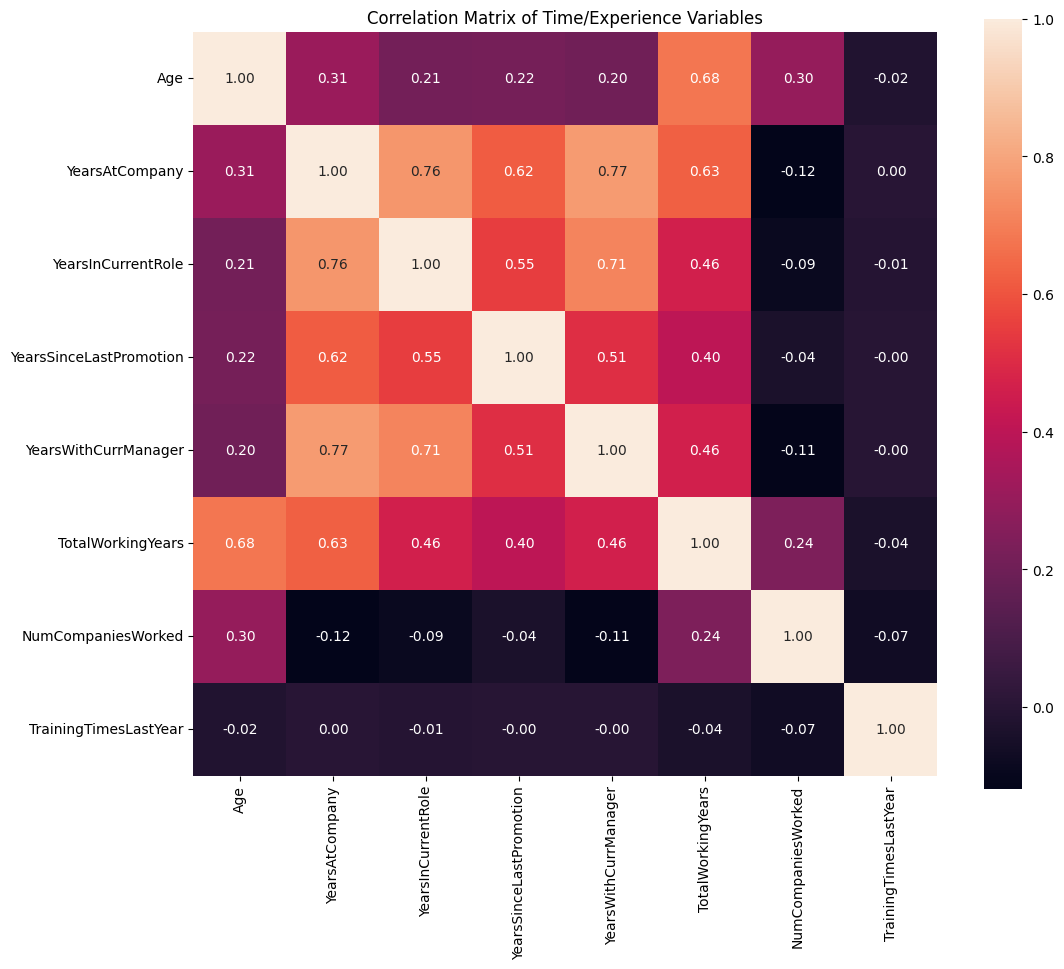

In [96]:
corr = data[time_exp_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Time/Experience Variables")
plt.show()

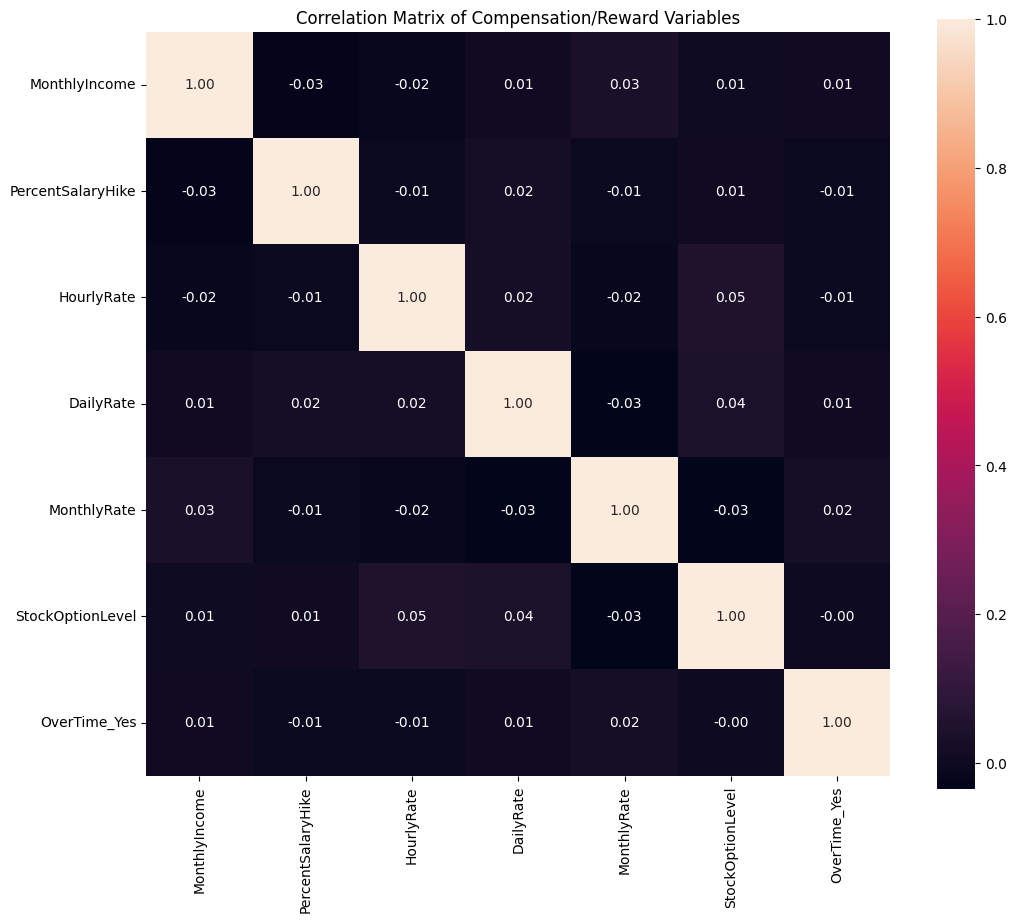

In [97]:
corr = data[comp_reward_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Compensation/Reward Variables")
plt.show()

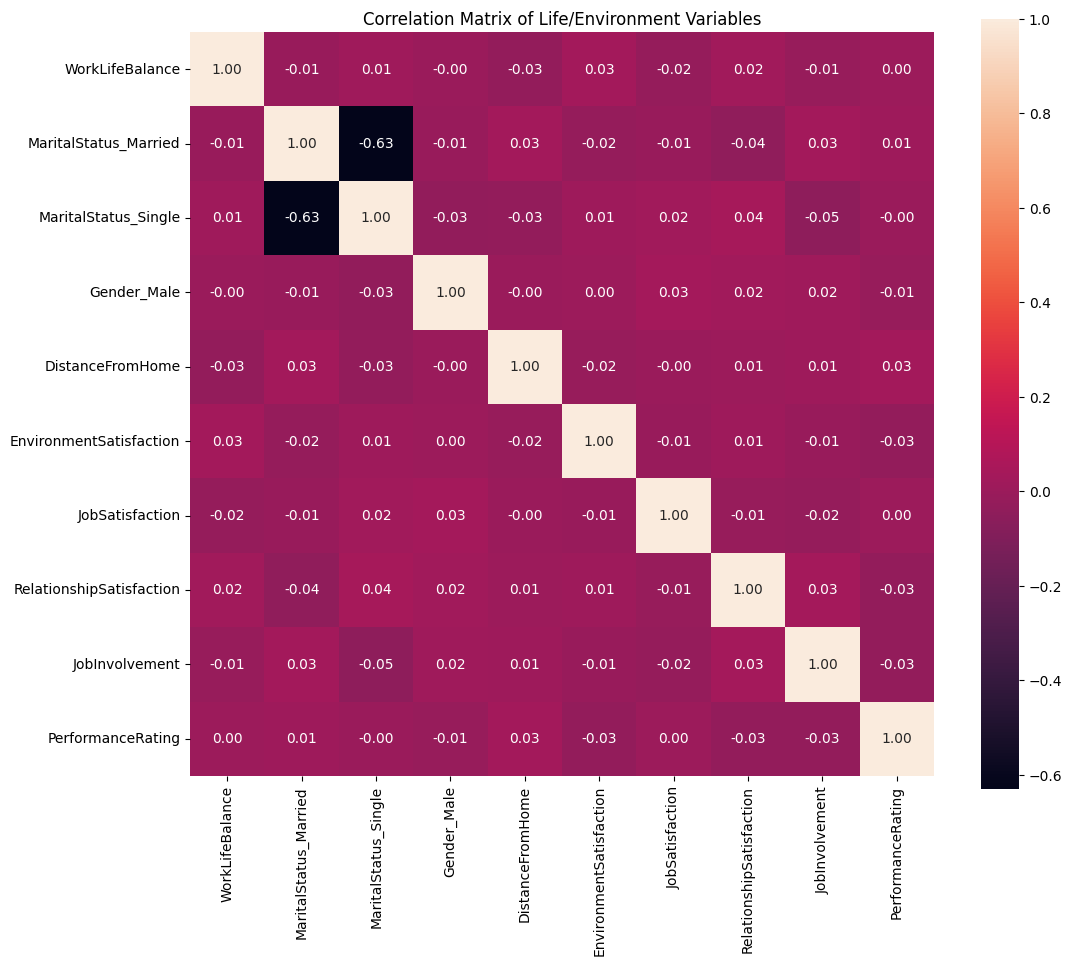

In [98]:
corr = data[life_env_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Life/Environment Variables")
plt.show()

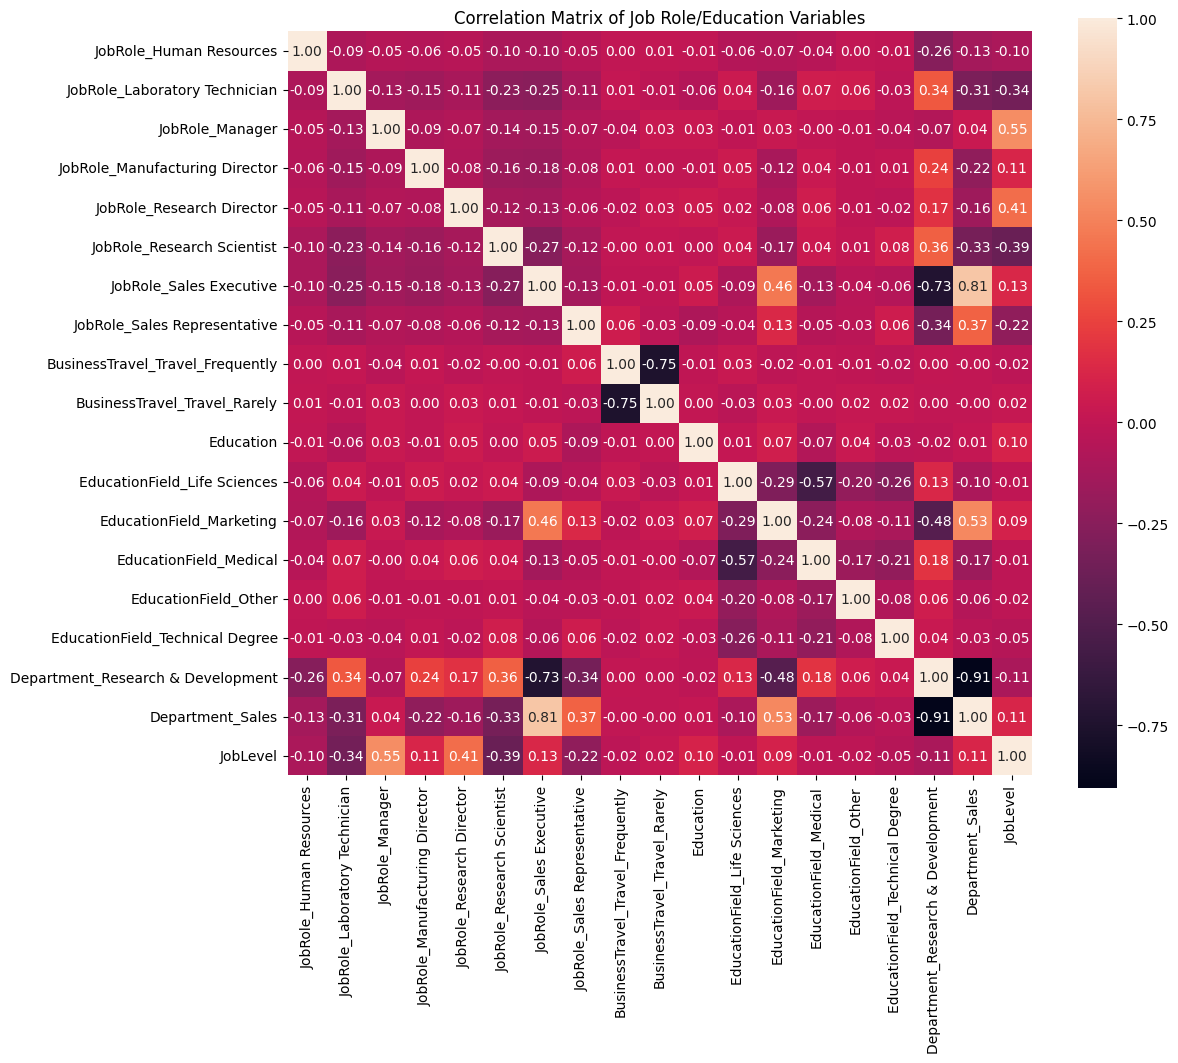

In [99]:
corr = data[job_role_data].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Job Role/Education Variables")
plt.show()

In [105]:
te_train, te_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition_Yes'])
time_exp_data = ["Age", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears", "NumCompaniesWorked", "TrainingTimesLastYear"]
X_train = te_train[time_exp_data]
y_train = te_train['Attrition_Yes']
X_test = te_test[time_exp_data]
y_test = te_test['Attrition_Yes']

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [106]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8412698412698413
Precision: 1.0
Recall: 0.014084507042253521
ROC-AUC: 0.5070422535211268

Confusion Matrix:
[[370   0]
 [ 70   1]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91       370
        True       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [108]:
comp_train, comp_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition_Yes'])
comp_reward_data = ["MonthlyIncome", "PercentSalaryHike", "HourlyRate", "DailyRate", "MonthlyRate", "StockOptionLevel", "OverTime_Yes"]
C_train = comp_train[comp_reward_data]
yc_train = comp_train['Attrition_Yes']
C_test = comp_test[comp_reward_data]
yc_test = comp_test['Attrition_Yes']

scaler = StandardScaler().fit(C_train)

C_train_scaled = scaler.transform(C_train)
C_test_scaled = scaler.transform(C_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(C_train_scaled, yc_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [110]:
yc_pred = log_reg.predict(C_test_scaled)
yc_prob = log_reg.predict(C_test_scaled)

print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred))
print("Recall:", recall_score(yc_test, yc_pred))
print("ROC-AUC:", roc_auc_score(yc_test, yc_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(yc_test, yc_pred))

print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

Accuracy: 0.8435374149659864
Precision: 0.6
Recall: 0.08450704225352113
ROC-AUC: 0.536848115721355

Confusion Matrix:
[[366   4]
 [ 65   6]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.91       370
        True       0.60      0.08      0.15        71

    accuracy                           0.84       441
   macro avg       0.72      0.54      0.53       441
weighted avg       0.81      0.84      0.79       441



In [112]:
life_train, life_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition_Yes'])
life_env_data = ["WorkLifeBalance", "MaritalStatus_Married", "MaritalStatus_Single", "Gender_Male", "DistanceFromHome", "EnvironmentSatisfaction", "JobSatisfaction", 
                     "RelationshipSatisfaction", "JobInvolvement", "PerformanceRating"]

L_train = life_train[life_env_data]
yl_train = life_train['Attrition_Yes']
L_test = life_test[life_env_data]
yl_test = life_test['Attrition_Yes']

scaler = StandardScaler().fit(L_train)

L_train_scaled = scaler.transform(L_train)
L_test_scaled = scaler.transform(L_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(L_train_scaled, yl_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [113]:
yl_pred = log_reg.predict(L_test_scaled)
yl_prob = log_reg.predict(L_test_scaled)

print("Accuracy:", accuracy_score(yl_test, yl_pred))
print("Precision:", precision_score(yl_test, yl_pred))
print("Recall:", recall_score(yl_test, yl_pred))
print("ROC-AUC:", roc_auc_score(yl_test, yl_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(yl_test, yl_pred))

print("\nClassification Report:")
print(classification_report(yl_test, yl_pred))

Accuracy: 0.8344671201814059
Precision: 0.3333333333333333
Recall: 0.028169014084507043
ROC-AUC: 0.508679101636848

Confusion Matrix:
[[366   4]
 [ 69   2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.99      0.91       370
        True       0.33      0.03      0.05        71

    accuracy                           0.83       441
   macro avg       0.59      0.51      0.48       441
weighted avg       0.76      0.83      0.77       441



In [114]:
job_train, job_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition_Yes'])
job_role_data = ["JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", 
                      "JobRole_Sales Executive", "JobRole_Sales Representative", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Education", "EducationField_Life Sciences", 
                      "EducationField_Marketing", "EducationField_Medical", "EducationField_Other", "EducationField_Technical Degree", "Department_Research & Development", "Department_Sales", "JobLevel"]
J_train = job_train[job_role_data]
yj_train = job_train['Attrition_Yes']
J_test = job_test[job_role_data]
yj_test = job_test['Attrition_Yes']

scaler = StandardScaler().fit(J_train)

J_train_scaled = scaler.transform(J_train)
J_test_scaled = scaler.transform(J_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(J_train_scaled, yj_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [115]:
yj_pred = log_reg.predict(J_test_scaled)
yj_prob = log_reg.predict(J_test_scaled)

print("Accuracy:", accuracy_score(yj_test, yj_pred))
print("Precision:", precision_score(yj_test, yj_pred))
print("Recall:", recall_score(yj_test, yj_pred))
print("ROC-AUC:", roc_auc_score(yj_test, yj_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(yj_test, yj_pred))

print("\nClassification Report:")
print(classification_report(yj_test, yj_pred))

Accuracy: 0.8344671201814059
Precision: 0.3333333333333333
Recall: 0.028169014084507043
ROC-AUC: 0.508679101636848

Confusion Matrix:
[[366   4]
 [ 69   2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.99      0.91       370
        True       0.33      0.03      0.05        71

    accuracy                           0.83       441
   macro avg       0.59      0.51      0.48       441
weighted avg       0.76      0.83      0.77       441



In [116]:
full_train, full_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Attrition_Yes'])
X_train_full = full_train.drop('Attrition_Yes', axis=1)
y_train_full = full_train['Attrition_Yes']

X_test_full = full_test.drop('Attrition_Yes', axis=1)
y_test_full = full_test['Attrition_Yes']

scaler = StandardScaler().fit(X_train_full)

X_train_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

log_reg_full = LogisticRegression(max_iter=500)
log_reg_full.fit(X_train_scaled, y_train_full)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [117]:
y_pred_full = log_reg_full.predict(X_test_scaled)
y_prob_full = log_reg_full.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print("Precision:", precision_score(y_test_full, y_pred_full))
print("Recall:", recall_score(y_test_full, y_pred_full))
print("ROC-AUC:", roc_auc_score(y_test_full, y_prob_full))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full))

print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_full))

Accuracy: 0.8798185941043084
Precision: 0.725
Recall: 0.4084507042253521
ROC-AUC: 0.6893604872478112

Confusion Matrix:
[[359  11]
 [ 42  29]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.97      0.93       370
        True       0.72      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.87      0.88      0.87       441



In [122]:
param_grid = {'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 5, 10, 15]}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train_full)

print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best CV score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

Best n_estimators: 200
Best max_depth: None
Best CV score: 0.8639450627515984


In [126]:
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test_full, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test_full, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test_full, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test_full, y_prob_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_full, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_rf))


Random Forest Accuracy: 0.8390022675736961
Random Forest Precision: 0.5
Random Forest Recall: 0.15492957746478872
Random Forest ROC-AUC: 0.5625999238675294

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.97      0.91       370
        True       0.50      0.15      0.24        71

    accuracy                           0.84       441
   macro avg       0.68      0.56      0.57       441
weighted avg       0.80      0.84      0.80       441


Random Forest Confusion Matrix:
[[359  11]
 [ 60  11]]


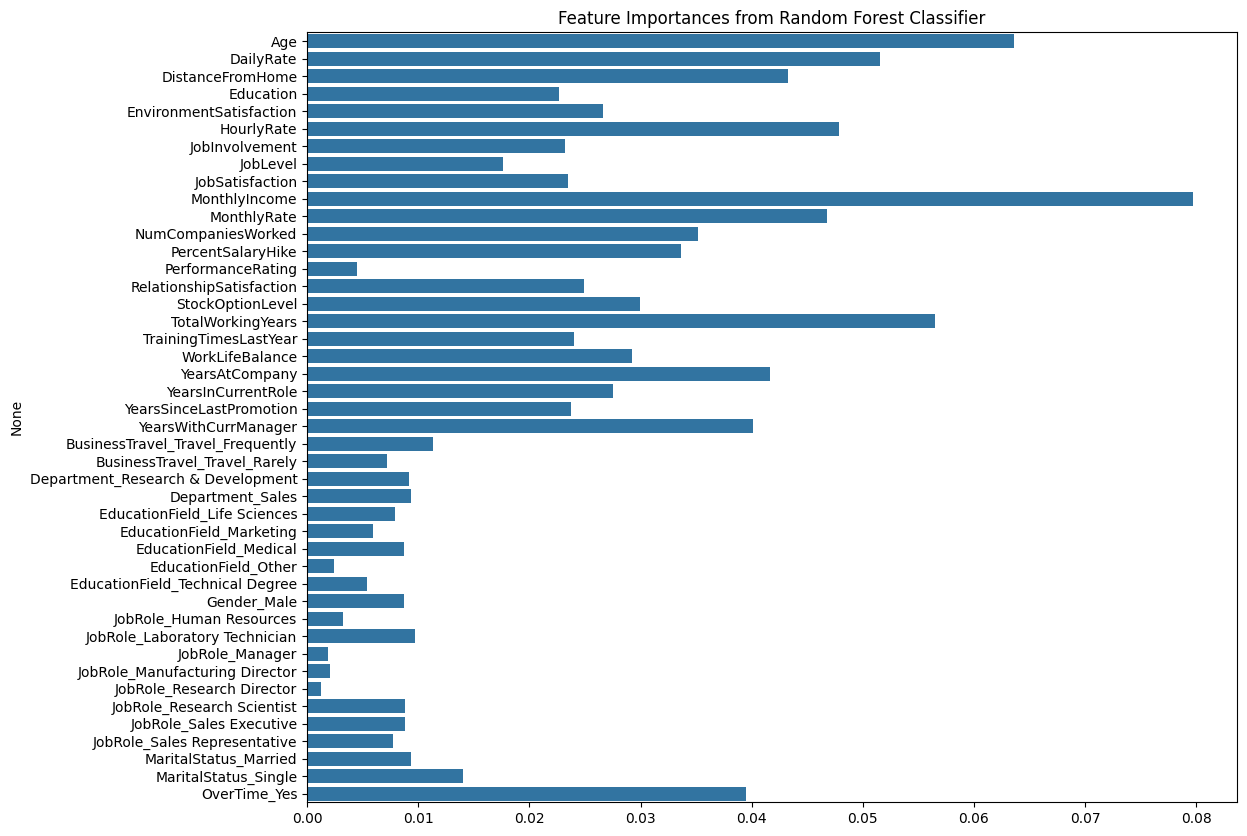

In [133]:
plt.figure(figsize=(12,10))
sns.barplot(x=best_rf.feature_importances_, y=X_train_full.columns)
plt.title("Feature Importances from Random Forest Classifier")
plt.show()

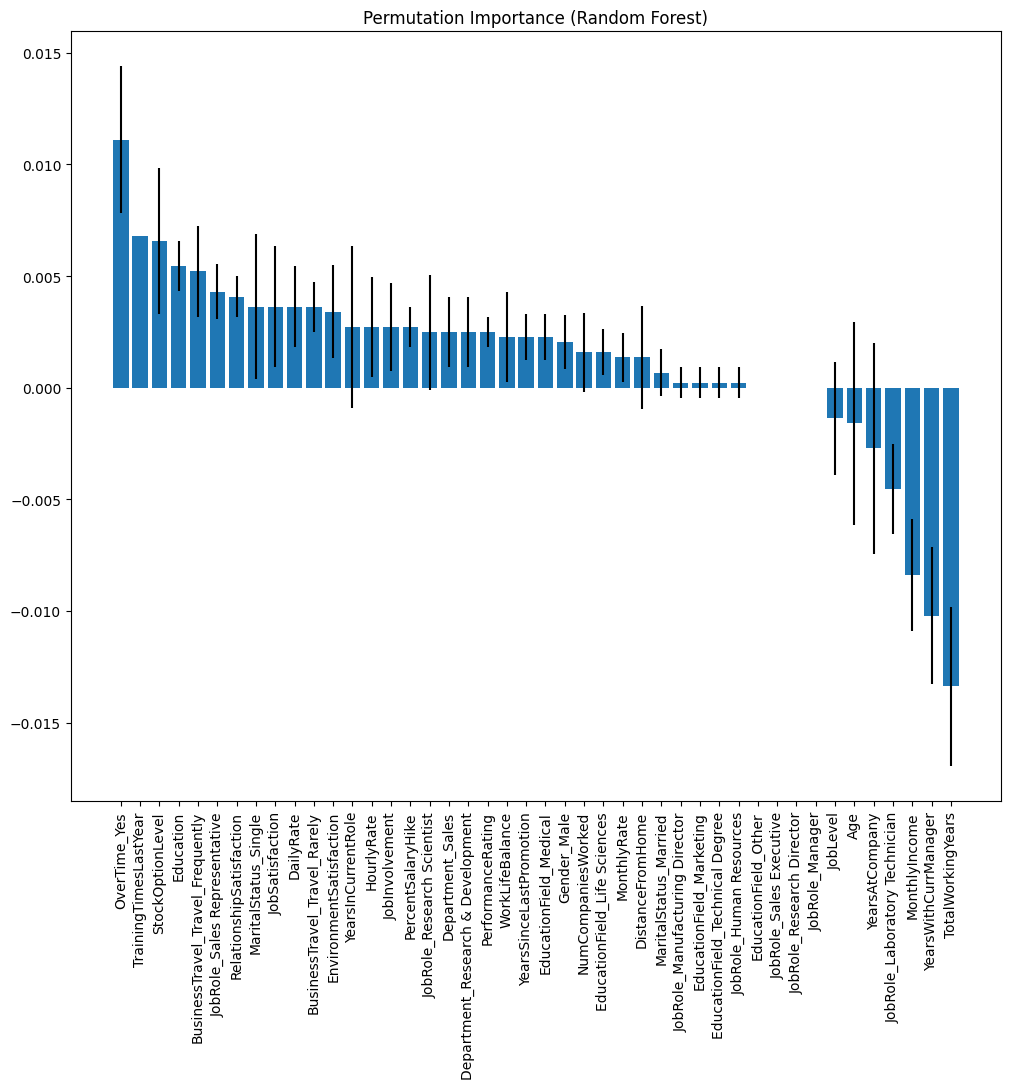

In [134]:
result = permutation_importance(best_rf, X_test_scaled, y_test_full, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,10))
plt.title("Permutation Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align='center')
plt.xticks(range(len(importances)), X_train_full.columns[indices], rotation=90)
plt.show()

In [135]:
results = {"Model": [
        "Set 1: Time/Experience",
        "Set 2: Compensation/Reward",
        "Set 3: Life/Environment",
        "Set 4: Job Role/Education",
        "Full Logistic Regression",
        "Random Forest"
    ],
    "Accuracy": [
        0.841,     # Set 1
        0.844,     # Set 2
        0.834,     # Set 3
        0.834,     # Set 4
        0.8798,    # Full LR
        0.8398     # RF
    ],
    "Precision": [
        1.00,   # Set 1
        0.60,   # Set 2
        0.333,  # Set 3
        0.333,  # Set 4
        0.725,  # Full LR
        0.50    # RF
    ],
    "Recall": [
        0.014,  # Set 1
        0.085,  # Set 2
        0.028,  # Set 3
        0.028,  # Set 4
        0.408,  # Full LR
        0.155   # RF
    ],
    "ROC-AUC": [
        0.507,  # Set 1
        0.536,  # Set 2
        0.508,  # Set 3
        0.509,  # Set 4
        0.689,  # Full LR
        0.565   # RF
    ]
}

comparison_df = pd.DataFrame(results)
comparison_df

,Model,Accuracy,Precision,Recall,ROC-AUC
0,Set 1: Time/Experience,0.8410,1.000,0.014,0.507
1,Set 2: Compensation/Reward,0.8440,0.600,0.085,0.536
2,Set 3: Life/Environment,0.8340,0.333,0.028,0.508
3,Set 4: Job Role/Education,0.8340,0.333,0.028,0.509
4,Full Logistic Regression,0.8798,0.725,0.408,0.689
5,Random Forest,0.8398,0.500,0.155,0.565
